In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
all_cols = ['Polygon_ID',
 'acq_date',
 'frp',
 'acq_time',
 'ELEV_sum',
 'ELEV_mean',
 'SLP_sum',
 'SLP_mean',
 'EVT_sum',
 'EVT_mean',
 'EVH_sum',
 'EVH_mean',
 'EVC_sum',
 'EVC_mean',
 'CBD_sum',
 'CBD_mean',
 'CBH_sum',
 'CBH_mean',
 'CC_sum',
 'CC_mean',
 'CH_sum',
 'CH_mean',
 'c_latitude',
 'c_longitude',
 'TEMP_min',
 'TEMP_max',
 'PRCP',
 'SNOW',
 'WDIR_ave',
 'WSPD_ave',
 'PRES_ave',
 'WCOMP']

cols = ['ELEV_sum',
 'ELEV_mean',
 'SLP_sum',
 'SLP_mean',
 'EVT_sum',
 'EVT_mean',
 'EVH_sum',
 'EVH_mean',
 'EVC_sum',
 'EVC_mean',
 'CBD_sum',
 'CBD_mean',
 'CBH_sum',
 'CBH_mean',
 'CC_sum',
 'CC_mean',
 'CH_sum',
 'CH_mean',
 'TEMP_min',
 'TEMP_max',
 'PRCP',
 'SNOW',
 'WDIR_ave',
 'WSPD_ave',
 'PRES_ave',
 'WCOMP']

In [4]:
fires = pd.read_csv("C:\\Users\\szhan\\Downloads\\MAD2502_Forest_Fire\\Dataset\\wildfiredb_us_2016.csv", usecols = all_cols)

In [5]:
fires.head()

,Polygon_ID,acq_date,frp,acq_time,ELEV_sum,ELEV_mean,SLP_sum,SLP_mean,EVT_sum,EVT_mean,...,c_latitude,c_longitude,TEMP_min,TEMP_max,PRCP,SNOW,WDIR_ave,WSPD_ave,PRES_ave,WCOMP
0,947330,2016-04-18,4.9,2143,0.0,0.0,0.0,0.0,25737.0,164.98077,...,-2.310176e+06,2.120505e+06,18.5,7.8,29.4,0.0,NaN,NaN,4.3,1016.8
1,978468,2016-11-14,0.7,943,0.0,0.0,0.0,0.0,25095.0,160.86539,...,-2.308676e+06,2.056755e+06,13.5,8.3,22.8,0.0,0.0,NaN,3.9,1021.0
2,1295072,2016-10-11,11.2,2144,0.0,0.0,0.0,0.0,25073.0,174.11806,...,-2.293301e+06,2.363505e+06,12.8,10.6,15.0,0.0,0.0,NaN,4.9,1018.4
3,1395647,2016-11-04,18.2,2053,0.0,0.0,0.0,0.0,56920.0,168.40237,...,-2.288426e+06,2.390130e+06,13.7,9.4,17.8,0.0,0.0,171.6,14.0,1019.6
4,1395715,2016-11-17,8.0,2010,0.0,0.0,0.0,0.0,51824.0,153.32544,...,-2.288426e+06,2.364630e+06,8.0,4.4,12.8,0.0,0.0,158.1,7.4,1020.8


In [6]:
fires.describe()

,Polygon_ID,frp,ELEV_sum,ELEV_mean,SLP_sum,SLP_mean,EVT_sum,EVT_mean,EVH_sum,EVH_mean,...,c_latitude,c_longitude,TEMP_min,TEMP_max,PRCP,SNOW,WDIR_ave,WSPD_ave,PRES_ave,WCOMP
count,2.793185e+06,2.793185e+06,2.793185e+06,2.793185e+06,2.793185e+06,2.793185e+06,2.793185e+06,2.793185e+06,2.793185e+06,2.793185e+06,...,2.793185e+06,2.793185e+06,2.792932e+06,2.793092e+06,2.793092e+06,2.790321e+06,2.425210e+06,1.678275e+06,2.792780e+06,2.785373e+06
mean,4.573263e+07,1.042587e+01,1.159594e+05,4.988689e+02,8.750707e+02,4.323684e+00,3.377867e+04,1.797674e+02,2.921417e+04,1.553358e+02,...,-1.409716e+05,1.616032e+06,1.716024e+01,9.740139e+00,2.487394e+01,5.314546e-01,3.326034e-01,1.926398e+02,1.081041e+01,1.017047e+03
std,2.343458e+07,2.868568e+01,1.781257e+05,6.779527e+02,1.631309e+03,6.891363e+00,2.203291e+04,9.549594e+01,1.951421e+04,8.436214e+01,...,1.135067e+06,6.157576e+05,7.486763e+00,8.137120e+00,7.688486e+00,3.737298e+00,6.028795e+00,9.265913e+01,6.161315e+00,5.916673e+00
min,2.273380e+05,0.000000e+00,-2.167800e+04,-6.859722e+01,0.000000e+00,0.000000e+00,8.800000e+01,1.100000e+01,8.800000e+01,1.100000e+01,...,-2.345051e+06,2.803804e+05,-2.630000e+01,-3.220000e+01,-2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.865000e+02
25%,2.438908e+07,1.600000e+00,1.137800e+04,6.134615e+01,4.700000e+01,2.708333e-01,1.878300e+04,1.047308e+02,1.591100e+04,9.213018e+01,...,-1.174676e+06,1.135755e+06,1.180000e+01,3.300000e+00,2.000000e+01,0.000000e+00,0.000000e+00,1.307000e+02,6.500000e+00,1.013400e+03
50%,4.902578e+07,3.800000e+00,4.065700e+04,2.151479e+02,2.560000e+02,1.465278e+00,3.071500e+04,1.785799e+02,2.608300e+04,1.447633e+02,...,1.857376e+04,1.526505e+06,1.720000e+01,9.400000e+00,2.560000e+01,0.000000e+00,0.000000e+00,1.921000e+02,9.700000e+00,1.016900e+03
75%,6.465689e+07,8.600000e+00,1.251100e+05,5.972778e+02,8.330000e+02,4.608975e+00,4.610400e+04,2.511528e+02,3.991900e+04,2.228225e+02,...,7.756988e+05,2.080005e+06,2.280000e+01,1.600000e+01,3.060000e+01,0.000000e+00,0.000000e+00,2.688000e+02,1.370000e+01,1.020900e+03
max,9.504961e+07,1.485400e+03,1.118260e+06,3.533868e+03,1.469200e+04,5.104142e+01,1.805670e+05,3.989586e+02,1.543290e+05,3.100000e+02,...,2.247949e+06,3.153255e+06,3.890000e+01,3.280000e+01,4.670000e+01,2.850000e+02,4.300000e+02,3.600000e+02,9.000000e+01,1.042000e+03


In [13]:
fires = fires.dropna()

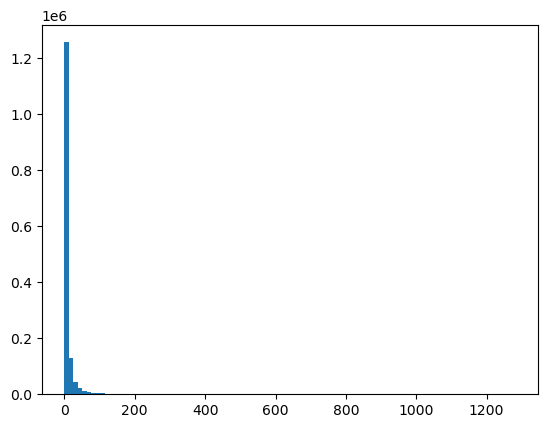

In [14]:
plt.hist(fires['frp'], bins=100)
plt.show()

In [15]:
# Create new column with area scaled https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html
# https://aosmith.rbind.io/2018/09/19/the-log-0-problem/ address 0.0

fires['frp_scaled'] = np.log10(fires['frp'] + 1)

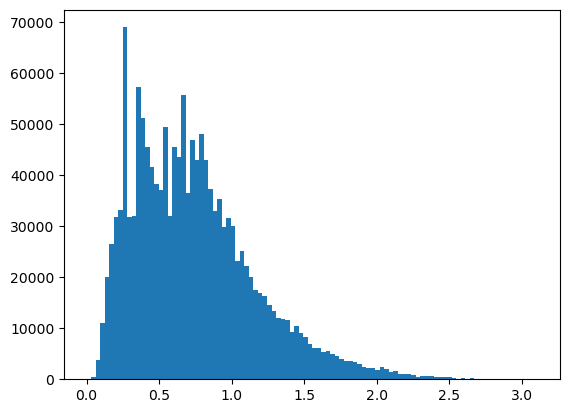

In [16]:
plt.hist(fires['frp_scaled'], bins=100)
plt.show()

In [17]:
X = fires[cols]  # Independent variables
Y = fires['frp_scaled']  # Dependent variable

# Separate 80% data into training set and 20% into test set
# random_state=0 ensures that the results are reproducible
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=0)

In [25]:
filepath = "C:\\Users\\szhan\\Downloads\\MAD2502_Forest_Fire\\Dataset\\wildfiredb_2016_subset.csv"
fires.to_csv(filepath, index=False)

## Predict with K-Nearest Neighbors Algorithm

In [18]:
# Applying k-nearest neighbors model
KNN_model = KNeighborsRegressor(n_neighbors=12)
KNN_model.fit(X_train,Y_train)
KNN_predict = KNN_model.predict(X_test) # Predictions on testing data
print(KNN_predict)

[0.49045597 1.28787515 0.95477801 ... 0.63240891 0.74371061 0.51236892]


In [23]:
error = mean_squared_error(Y_test, KNN_predict)
print("Mean Squared Error:", error)

Mean Squared Error: 0.0661636567252851


In [39]:
# https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
# Calculate the absolute errors
errors = abs(KNN_predict - Y_test)

# Print out the mean absolute error (MAE)
print('Mean Absolute Error:', np.mean(errors))

Mean Absolute Error: 0.18338523688280137


## Predict with Random Forest

- https://medium.com/@theclickreader/random-forest-regression-explained-with-implementation-in-python-3dad88caf165
- https://openreview.net/pdf?id=6nblryHxVbO

The random forest model consists of a maximum depth of 30,
maximum samples per iteration of 5,000, and trees are varied between 50, 100, and 500. We find that
the random forest model was insensitive to the number of trees

In [28]:
RF_model = RandomForestRegressor(n_estimators = 50, max_depth = 30, max_samples=5000).fit(X_train, Y_train)
RF_predict = RF_model.predict(X_test) # Predictions on testing data

In [29]:
error = mean_squared_error(Y_test, RF_predict)
print("Mean Squared Error:", error)

Mean Squared Error: 0.12109952413609848


In [38]:
# https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
# Calculate the absolute errors
errors = abs(RF_predict - Y_test)

# Print out the mean absolute error (MAE)
print('Mean Absolute Error:', np.mean(errors))

Mean Absolute Error: 0.26264674871950844


## Predict with Decision Tree Algorithm

- Code references tutorial https://www.askpython.com/python/examples/python-predict-function
- Accuracy references https://towardsdatascience.com/k-nearest-neighbors-94395f445221

In [40]:
DT_model = DecisionTreeRegressor(max_depth=5).fit(X_train,Y_train)
DT_predict = DT_model.predict(X_test) # Predictions on testing data
print(DT_predict)

[0.57195822 1.22504886 1.03564076 ... 0.57195822 0.67975449 0.57195822]


In [41]:
error = mean_squared_error(Y_test, DT_predict)
r2 = r2_score(Y_test, DT_predict)
print("Mean Squared Error:", error)
print("R2 Score:", r2)

Mean Squared Error: 0.14824002009709225
R2 Score: 0.18335106130816747


In [42]:
# https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
# Calculate the absolute errors
errors = abs(DT_predict - Y_test)

# Print out the mean absolute error (MAE)
print('Mean Absolute Error:', np.mean(errors))

Mean Absolute Error: 0.29349253684084375
